# Raw Data/pnboia_qc filtered Data - Comparison

This notebook aims to compare filtered data generated using the pnboia_qc package with raw data.



## Importing Libs

In [2]:
# IMPORT LIBS
import pandas as pd
idx = pd.IndexSlice
pd.set_option("display.precision", 2)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('default')

from glob import glob
import os

## Loading Data

In [5]:
# PATHS
# raw_data
analyses_path = '/home/remobs-dados/remobs_analyses/raw'
data_path = os.path.join(analyses_path, 'data')
data_raw_path = os.path.join(analyses_path, 'data/data_raw')
images_path = os.path.join(analyses_path, 'images/')

# filtered data
filtered_data_path = '/home/remobs-dados/pnboia_qc/filtered_data'

In [40]:
# LOAD DATA
# Raw data
os.chdir(data_path)

buoys_df = pd.read_csv('pnboia_raw_data.csv',parse_dates=['Datetime'],index_col=['buoy','Datetime'])
buoys_df.sort_index(inplace=True)

# Filtered data
os.chdir(filtered_data_path)

files_list = glob('*.csv')
buoys_filt_names = [file.split('_')[0] for file in files_list]

buoys_filt_df = pd.read_csv(files_list[0])
buoys_filt_df['buoy'] = buoys_filt_names[0]
for i,file in enumerate(files_list[1:]):
    file_df = pd.read_csv(file,parse_dates=['Datetime'])
    file_df['buoy'] = file.split('_')[0]
    buoys_filt_df = pd.concat([buoys_filt_df,file_df])

buoys_filt_df.set_index(['buoy','Datetime'],inplace=True)
buoys_filt_df.sort_index(inplace=True)

# Get buoys names
buoys = buoys_df.reset_index().loc[:,'buoy'].unique()

In [42]:
buoys_filt_df

battery  wspd1  gust1  wdir1  wspd2  gust2  wdir2  \
buoy Datetime                                                                 
cf   2009-06-24 15:00:00    13.50   1.42   1.97   31.0    NaN    NaN    NaN   
     2009-06-24 16:00:00    13.50   1.42   1.97   56.0    NaN    NaN    NaN   
     2009-06-24 17:00:00    13.50   0.66   1.31  149.0    NaN    NaN    NaN   
     2009-06-24 18:00:00    13.50   0.22   0.88  168.0    NaN    NaN    NaN   
     2009-06-24 19:00:00    13.40   1.20   2.08  245.0    NaN    NaN    NaN   
...                           ...    ...    ...    ...    ...    ...    ...   
vi   2017-07-23 00:00:00    12.73   5.47   6.57  200.0   5.58   6.69  209.0   
     2017-07-23 01:00:00    12.71   4.93   5.80  204.0   5.02   5.91  213.0   
     2017-07-23 02:00:00    12.70   5.58   6.79  204.0   5.69   6.92  213.0   
     2017-07-23 03:00:00    12.69   5.25   6.13  206.0   5.24   6.36  215.0   
     2017-07-23 04:00:00    12.68   4.93   5.80  209.0   5.02   5.91  218.0   

                          atmp    rh  dewpt  ...   cspd3   cdir3  swvht  \
buoy Datetime                                ...                          
cf   2009-06-24 15:00:00  23.1  77.1   18.8  ...     NaN     NaN   1.83   
     2009-06-24 16:00:00  23.5  77.6   19.4  ...     NaN     NaN   1.78   
     2009-06-24 17:00:00  24.3  74.2   19.4  ...     NaN     NaN   1.86   
     2009-06-24 18:00:00  24.4  77.4   20.2  ...     NaN     NaN   1.85   
     2009-06-24 19:00:00  24.3   NaN   21.2  ...     NaN     NaN   1.92   
...                        ...   ...    ...  ...     ...     ...    ...   
vi   2017-07-23 00:00:00  23.3  79.3   19.5  ...   31.35  295.57   1.09   
     2017-07-23 01:00:00  23.2  79.3   19.5  ...   98.14  303.93   1.03   
     2017-07-23 02:00:00  23.3  78.5   19.4  ...  101.34  318.06   1.12   
     2017-07-23 03:00:00  23.4  75.2   18.8  ...  131.23  335.00   1.11   
     2017-07-23 04:00:00  23.3  75.1   18.7  ...  149.10  321.71   1.18   

                          mxwvht    tp  wvdir  spred  wspd   wdir  gust  
buoy Datetime                                                            
cf   2009-06-24 15:00:00    2.85   9.5  116.5   38.4  1.42   31.0  1.97  
     2009-06-24 16:00:00    2.87   9.5  111.1   43.5  1.42   56.0  1.97  
     2009-06-24 17:00:00    2.89  10.0  108.7   39.0  0.66  149.0  1.31  
     2009-06-24 18:00:00    2.51   9.5  106.9   43.3  0.22  168.0  0.88  
     2009-06-24 19:00:00    3.16  10.0  110.9   37.5  1.20  245.0  2.08  
...                          ...   ...    ...    ...   ...    ...   ...  
vi   2017-07-23 00:00:00    1.88  10.0  154.0   40.1  5.47  200.0  6.57  
     2017-07-23 01:00:00    1.57   8.7  154.6   44.1  4.93  204.0  5.80  
     2017-07-23 02:00:00    1.63   9.1  139.7   51.8  5.58  204.0  6.79  
     2017-07-23 03:00:00    1.61   7.7  159.5   56.0  5.25  206.0  6.13  
     2017-07-23 04:00:00    1.76   9.5  163.3   52.8  4.93  209.0  5.80  

[299450 rows x 28 columns]

In [43]:
buoys_df

lon    lat  battery  wspd1  gust1  wdir1  wspd2  \
buoy Datetime                                                                 
cf   2009-06-24 15:00:00 -41.86 -23.05    13.50    1.3    1.8   31.0    NaN   
     2009-06-24 16:00:00 -41.86 -23.05    13.50    1.3    1.8   56.0    NaN   
     2009-06-24 17:00:00 -41.86 -23.05    13.50    0.6    1.2  149.0    NaN   
     2009-06-24 18:00:00 -41.86 -23.05    13.50    0.2    0.8  168.0    NaN   
     2009-06-24 19:00:00 -41.86 -23.05    13.40    1.1    1.9  245.0    NaN   
...                         ...    ...      ...    ...    ...    ...    ...   
vi   2017-07-23 00:00:00 -39.70 -19.93    12.73    5.0    6.0  200.0    5.0   
     2017-07-23 01:00:00 -39.70 -19.93    12.71    4.5    5.3  204.0    4.5   
     2017-07-23 02:00:00 -39.70 -19.93    12.70    5.1    6.2  204.0    5.1   
     2017-07-23 03:00:00 -39.70 -19.93    12.69    4.8    5.6  206.0    4.7   
     2017-07-23 04:00:00 -39.70 -19.93    12.68    4.5    5.3  209.0    4.5   

                          gust2  wdir2  atmp  ...   cdir1   cvel2   cdir2  \
buoy Datetime                                 ...                           
cf   2009-06-24 15:00:00    NaN    NaN  23.1  ...     NaN     NaN     NaN   
     2009-06-24 16:00:00    NaN    NaN  23.5  ...     NaN     NaN     NaN   
     2009-06-24 17:00:00    NaN    NaN  24.3  ...     NaN     NaN     NaN   
     2009-06-24 18:00:00    NaN    NaN  24.4  ...     NaN     NaN     NaN   
     2009-06-24 19:00:00    NaN    NaN  24.3  ...     NaN     NaN     NaN   
...                         ...    ...   ...  ...     ...     ...     ...   
vi   2017-07-23 00:00:00    6.0  209.0  23.3  ...  281.00   41.94  297.37   
     2017-07-23 01:00:00    5.3  213.0  23.2  ...  294.57   76.71  295.33   
     2017-07-23 02:00:00    6.2  213.0  23.3  ...  319.53  103.59  320.12   
     2017-07-23 03:00:00    5.7  215.0  23.4  ...  331.69  138.94  337.08   
     2017-07-23 04:00:00    5.3  218.0  23.3  ...  313.75  149.46  319.26   

                           cvel3   cdir3  wvht  wmax   dpd    mwd  spred  
buoy Datetime                                                             
cf   2009-06-24 15:00:00     NaN     NaN  1.83  2.85   9.5  116.5   38.4  
     2009-06-24 16:00:00     NaN     NaN  1.78  2.87   9.5  111.1   43.5  
     2009-06-24 17:00:00     NaN     NaN  1.86  2.89  10.0  108.7   39.0  
     2009-06-24 18:00:00     NaN     NaN  1.85  2.51   9.5  106.9   43.3  
     2009-06-24 19:00:00     NaN     NaN  1.92  3.16  10.0  110.9   37.5  
...                          ...     ...   ...   ...   ...    ...    ...  
vi   2017-07-23 00:00:00   31.35  295.57  1.09  1.88  10.0  154.0   40.1  
     2017-07-23 01:00:00   98.14  303.93  1.03  1.57   8.7  154.6   44.1  
     2017-07-23 02:00:00  101.34  318.06  1.12  1.63   9.1  139.7   51.8  
     2017-07-23 03:00:00  131.23  335.00  1.11  1.61   7.7  159.5   56.0  
     2017-07-23 04:00:00  149.10  321.71  1.18  1.76   9.5  163.3   52.8  

[299450 rows x 27 columns]

# Comparison

## 1. Boia Cabo Frio

In [54]:
buoys_df.loc[buoy].columns

Index(['lon', 'lat', 'battery', 'wspd1', 'gust1', 'wdir1', 'wspd2', 'gust2',
       'wdir2', 'atmp', 'humi', 'dewp', 'pres', 'wtmp', 'bhead', 'arad',
       'cvel1', 'cdir1', 'cvel2', 'cdir2', 'cvel3', 'cdir3', 'wvht', 'wmax',
       'dpd', 'mwd', 'spred'],
      dtype='object')

In [55]:
buoys_filt_df.loc[buoy].columns

Index(['battery', 'wspd1', 'gust1', 'wdir1', 'wspd2', 'gust2', 'wdir2', 'atmp',
       'rh', 'dewpt', 'pres', 'sst', 'bhead', 'arad', 'cspd1', 'cdir1',
       'cspd2', 'cdir2', 'cspd3', 'cdir3', 'swvht', 'mxwvht', 'tp', 'wvdir',
       'spred', 'wspd', 'wdir', 'gust'],
      dtype='object')

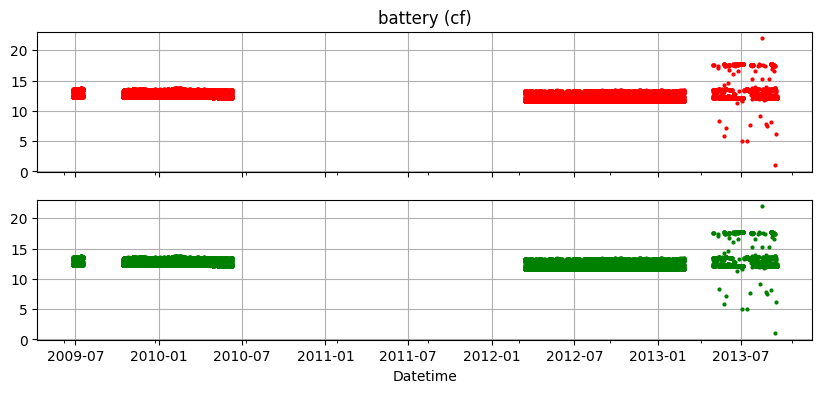

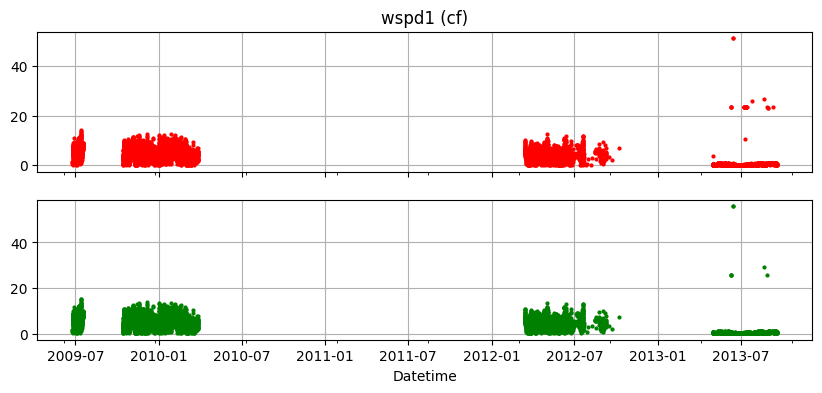

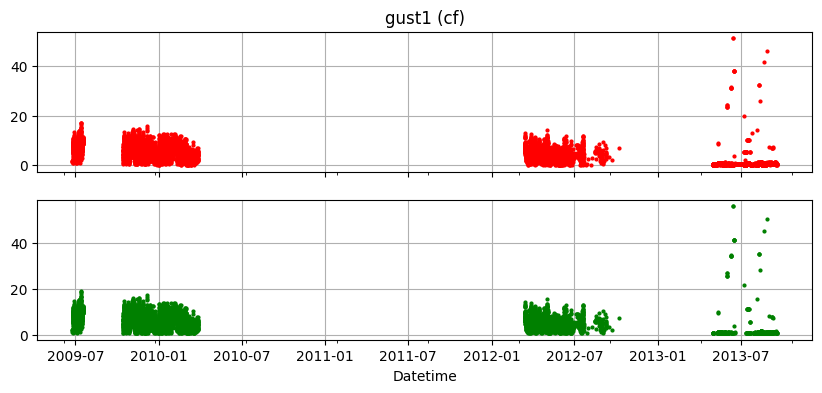

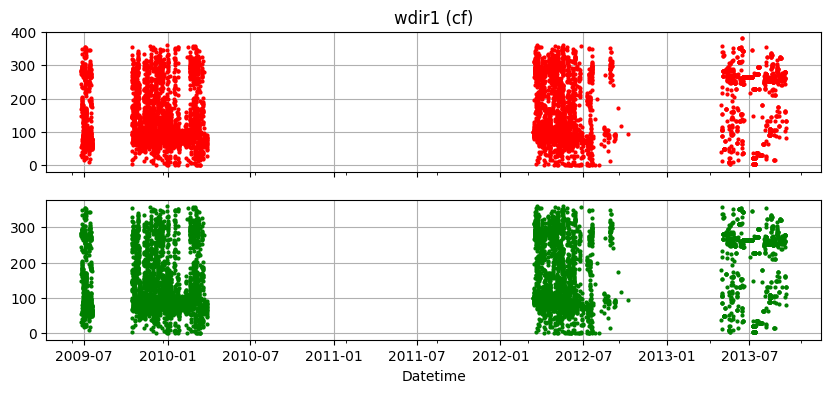

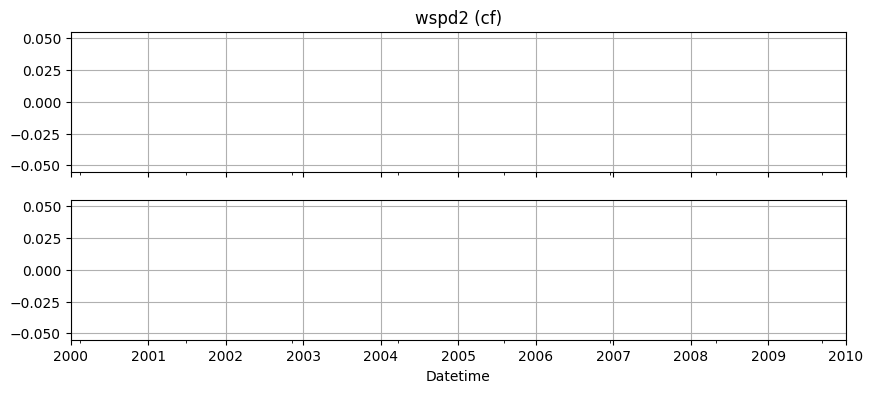

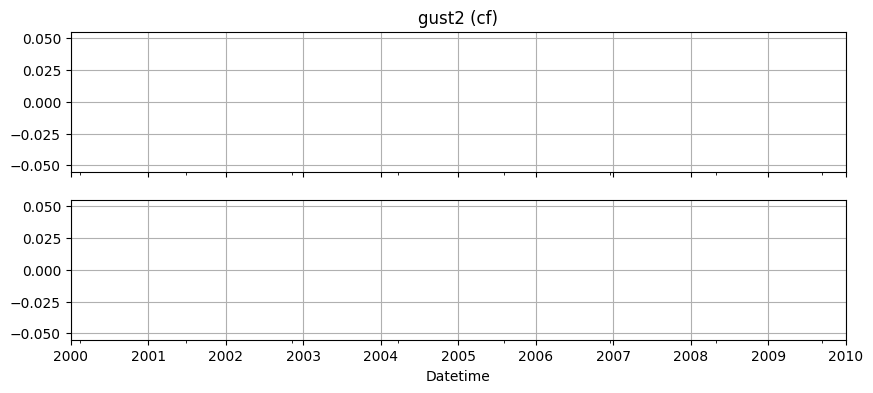

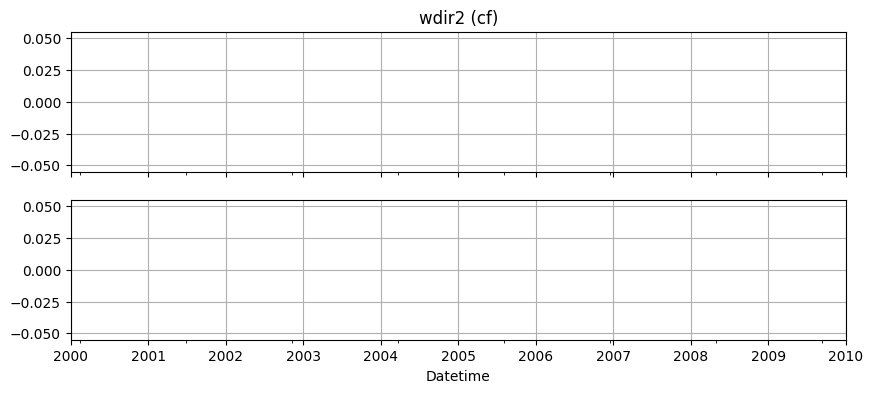

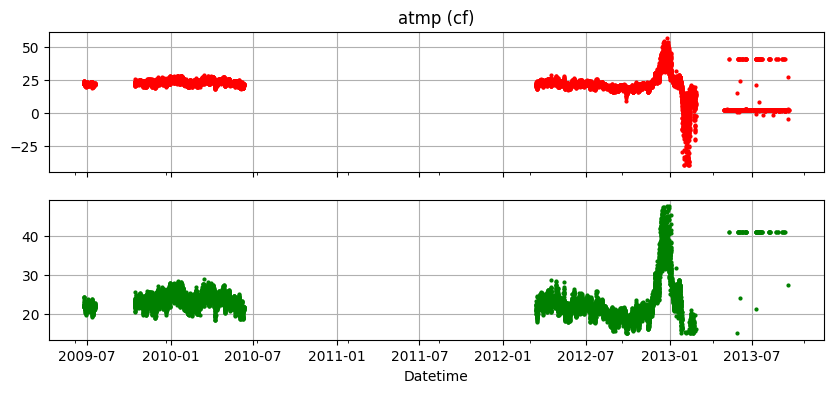

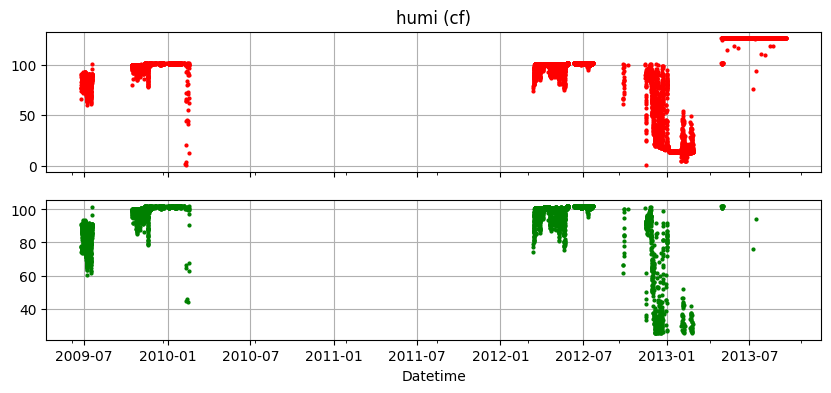

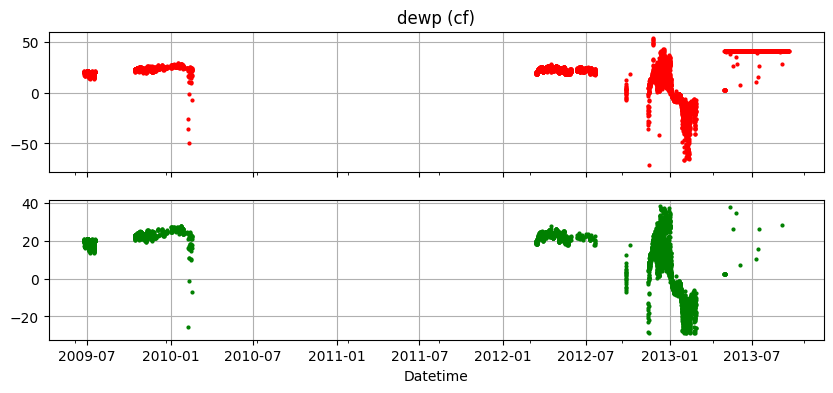

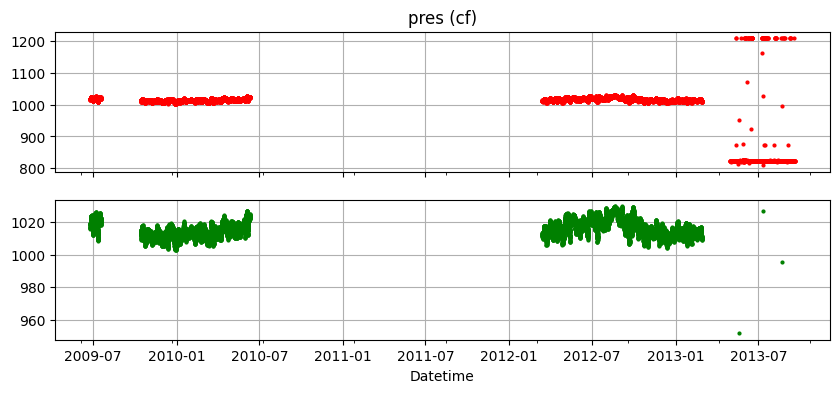

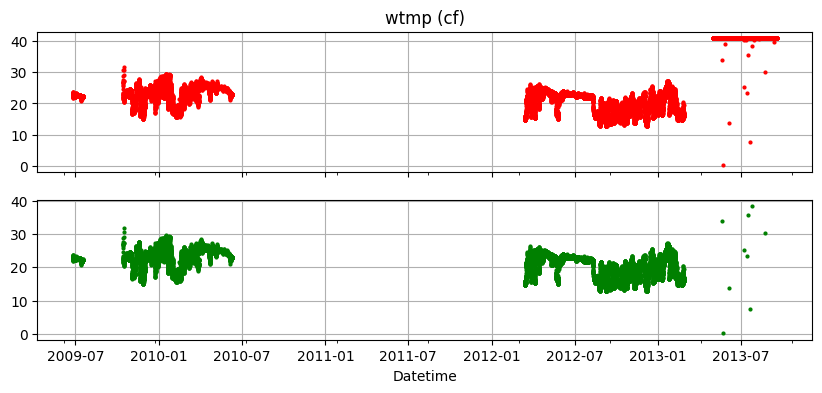

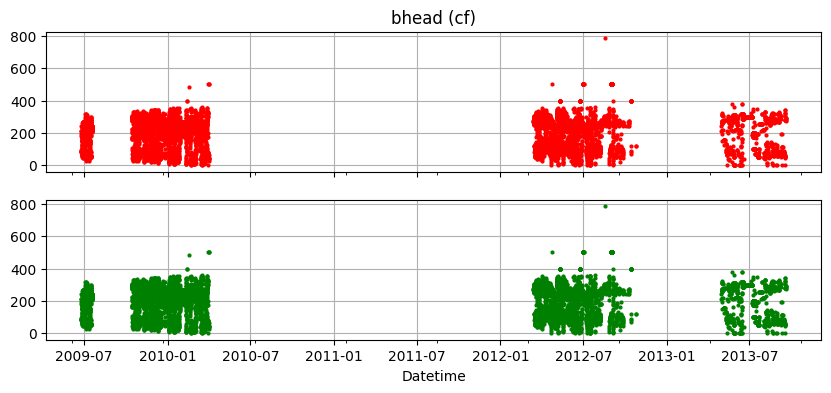

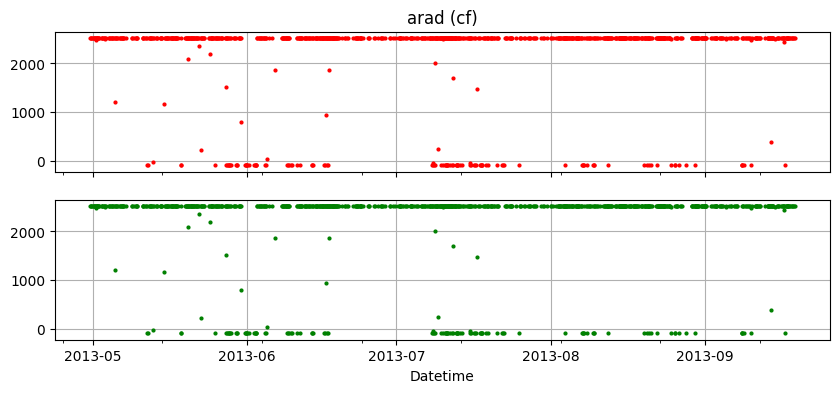

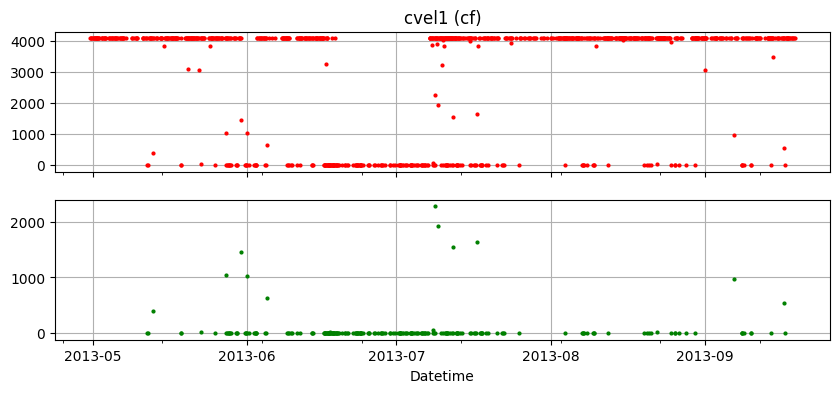

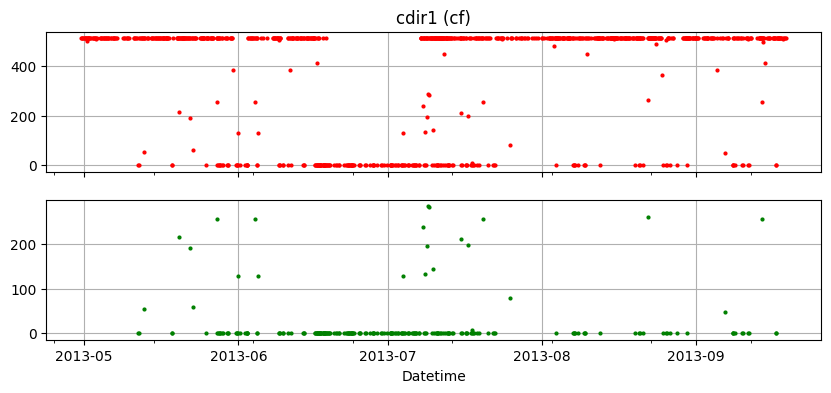

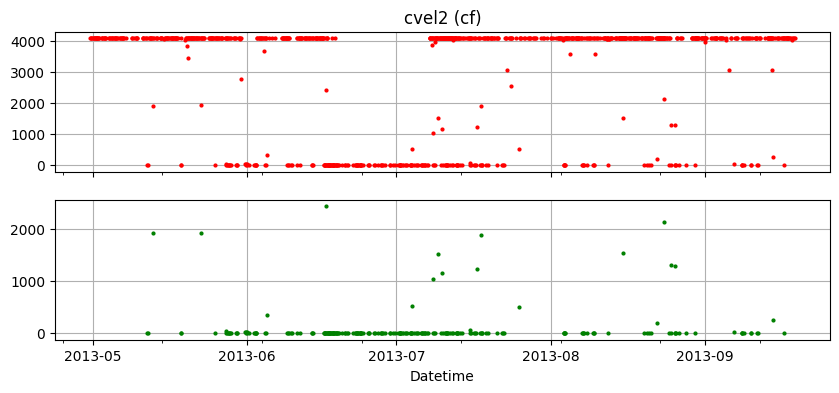

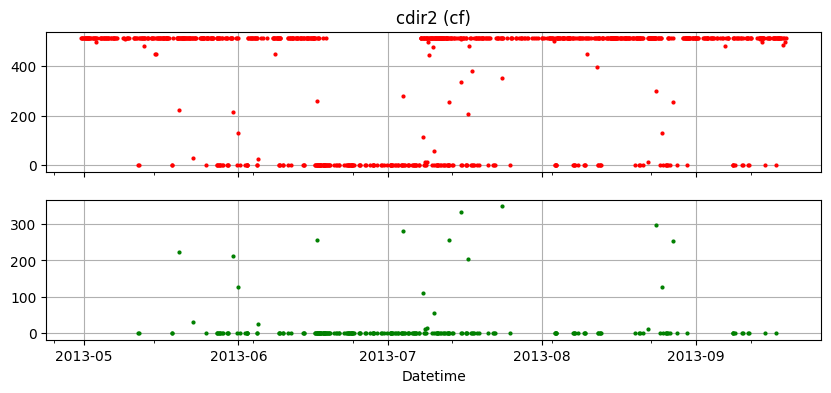

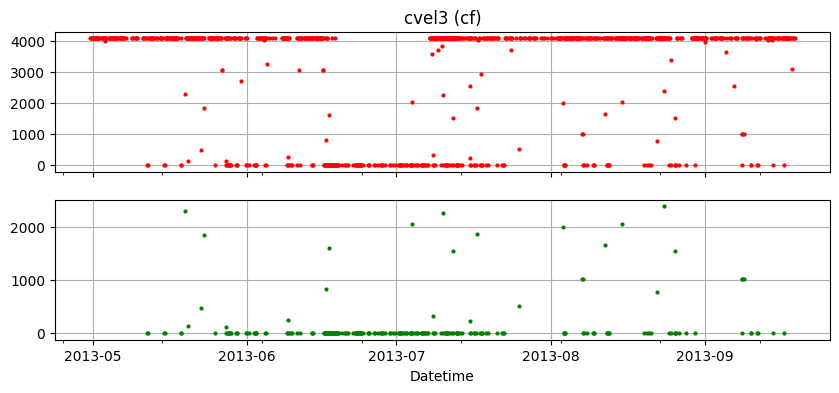

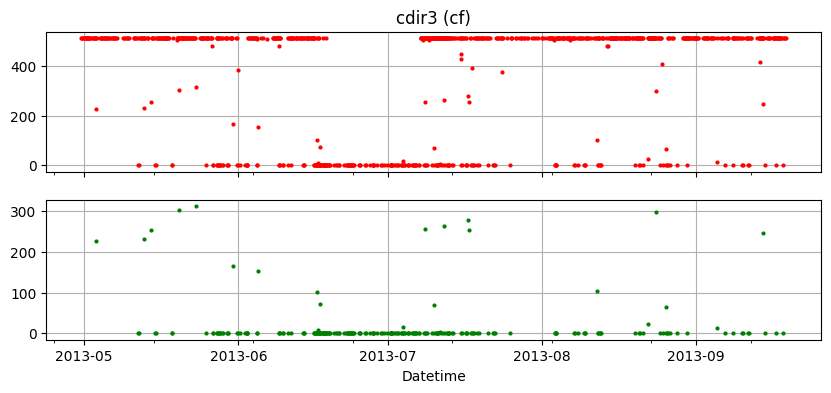

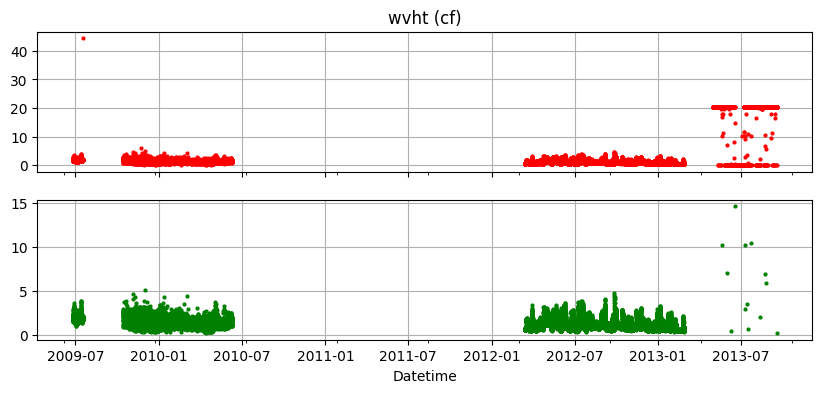

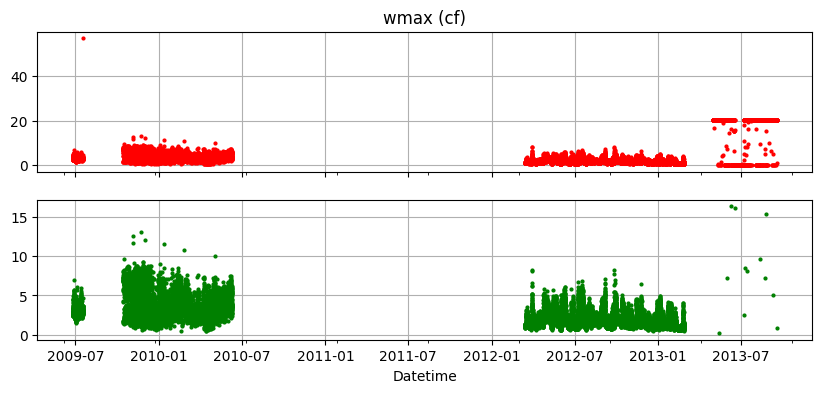

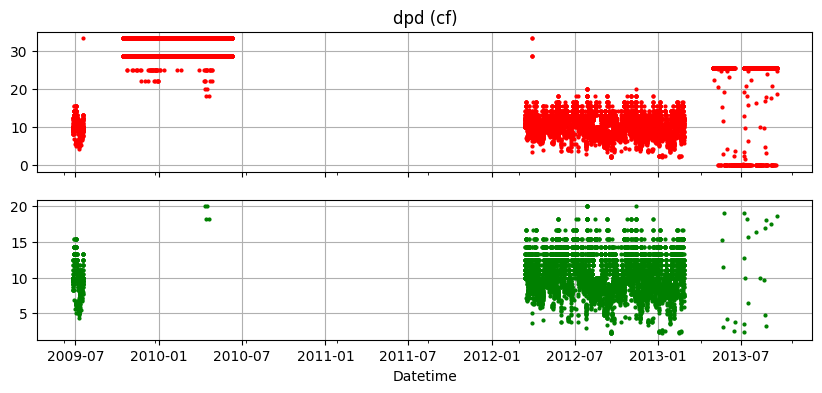

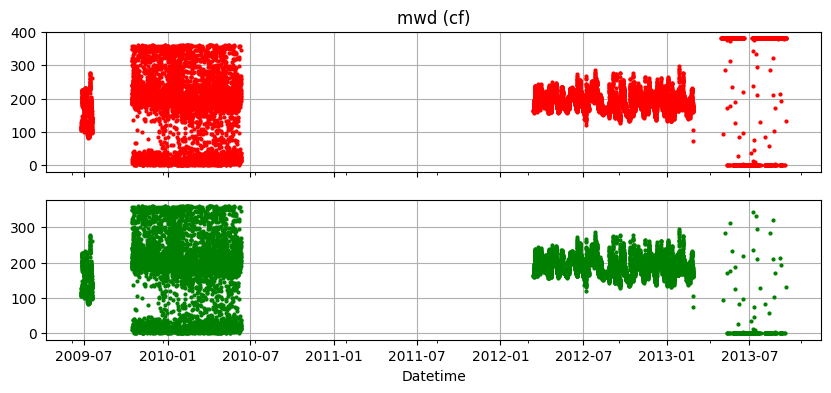

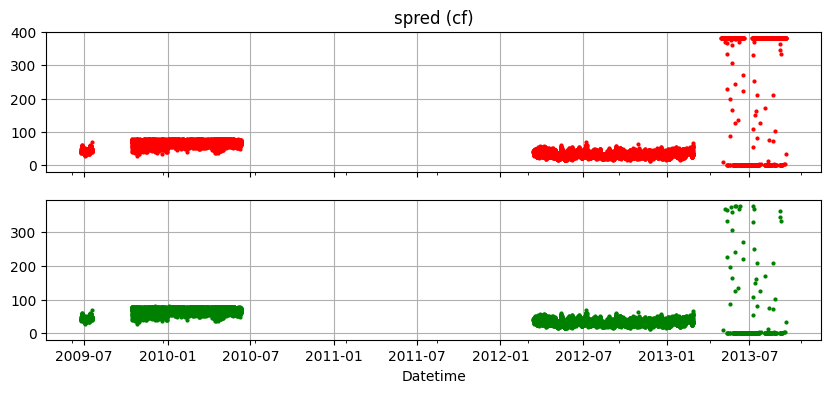

In [63]:
buoy = 'cf'
params_raw = buoys_df.loc[buoy].columns[2:]
params_filt = buoys_filt_df.loc[buoy].columns
for param, param_filt in zip(params_raw,params_filt):
    fig, ax = plt.subplots(2,1,sharex=True,figsize=(10,4))
    buoys_df.loc[buoy,param].plot(subplots=True,color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax[0]);
    buoys_filt_df.loc[buoy,param_filt].plot(subplots=True,color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax[1]);
    ax[0].set_title(param+' '+f'({buoy})')
    plt.show()

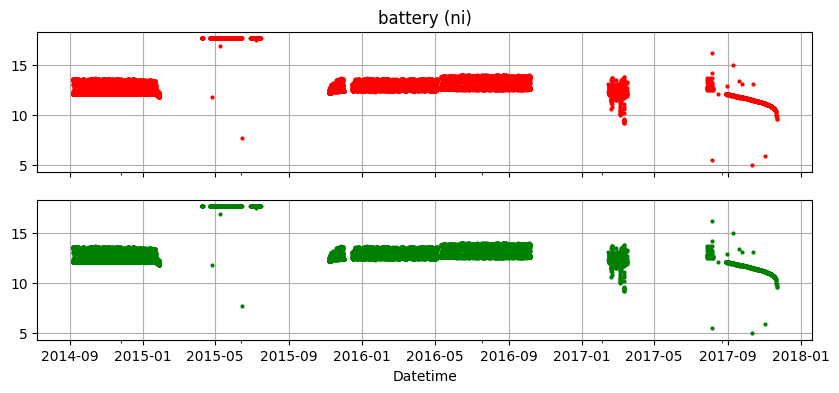

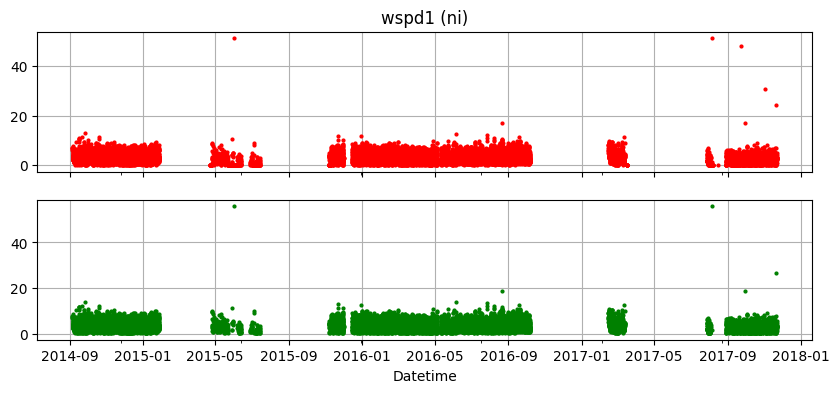

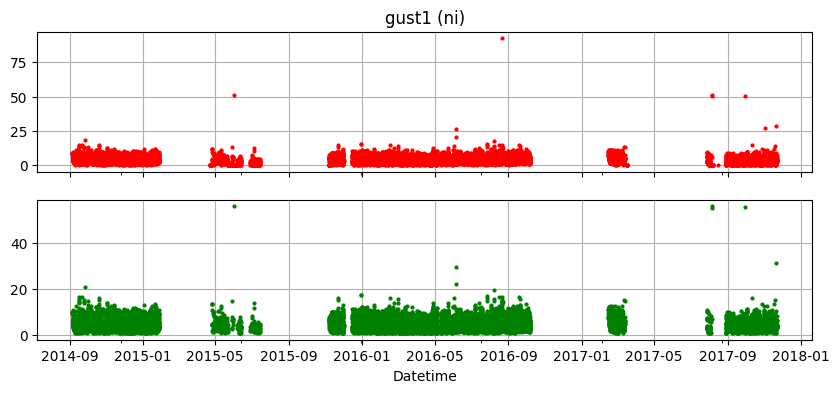

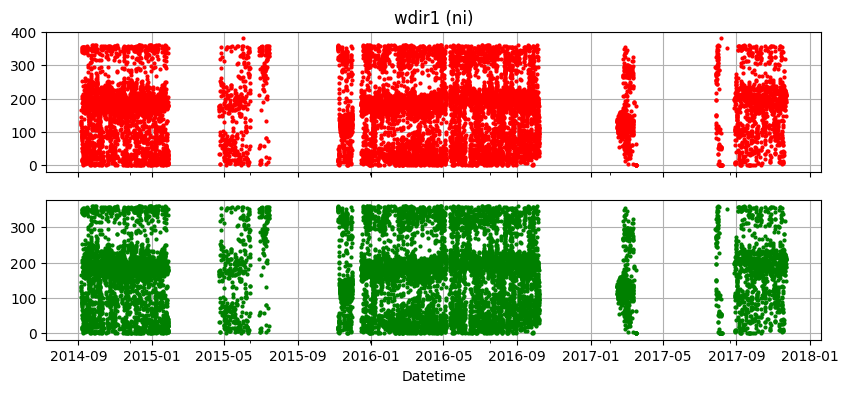

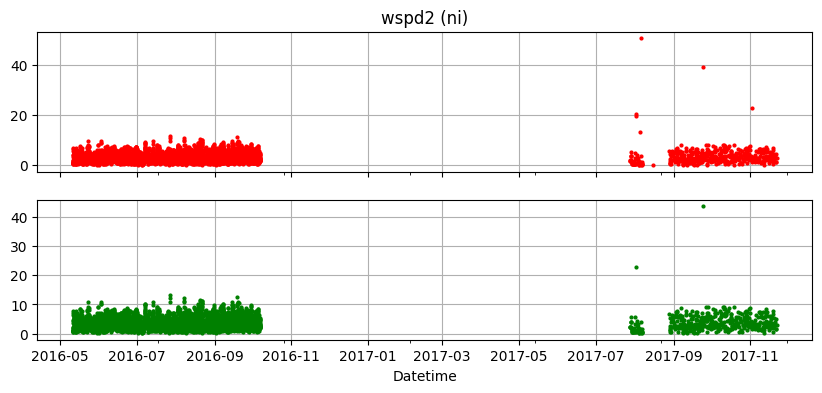

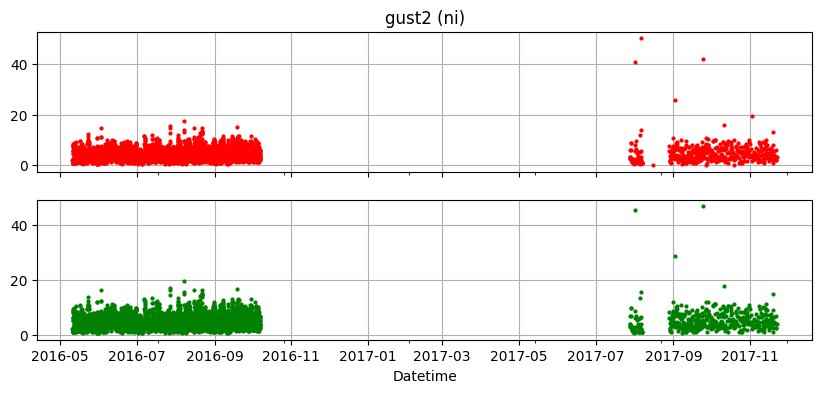

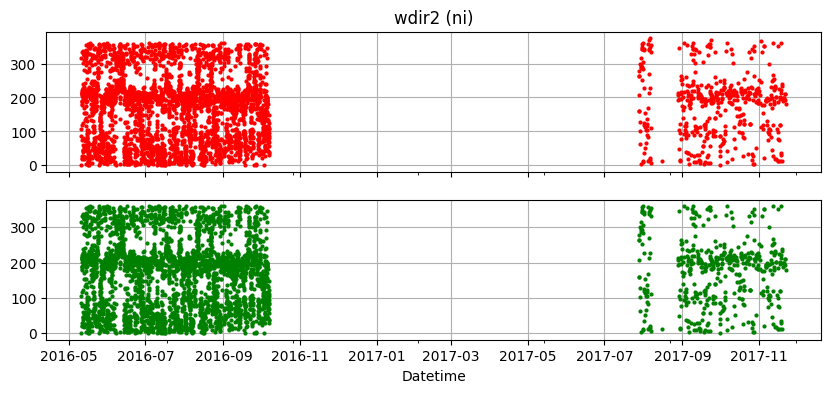

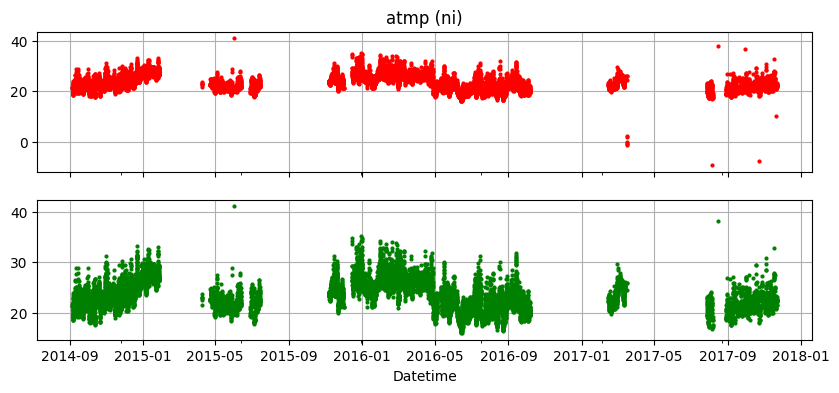

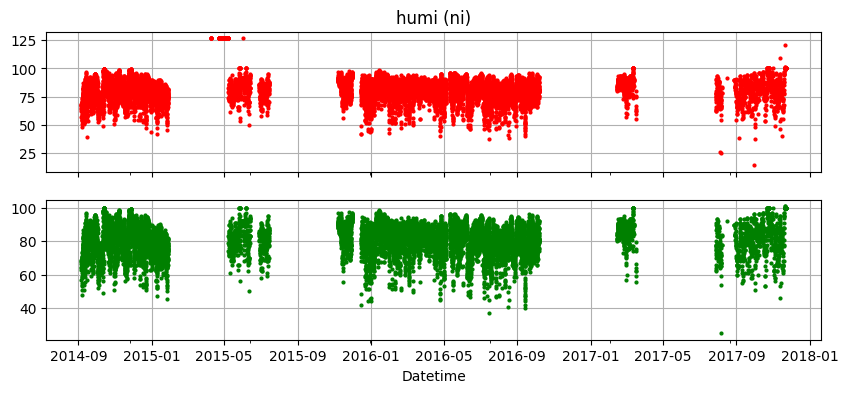

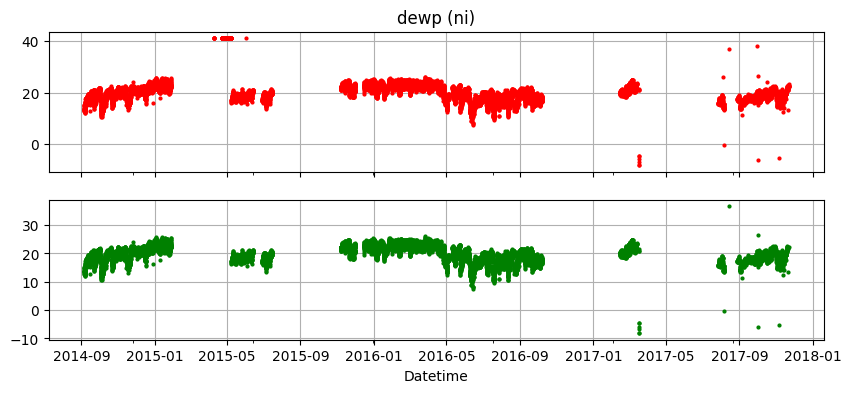

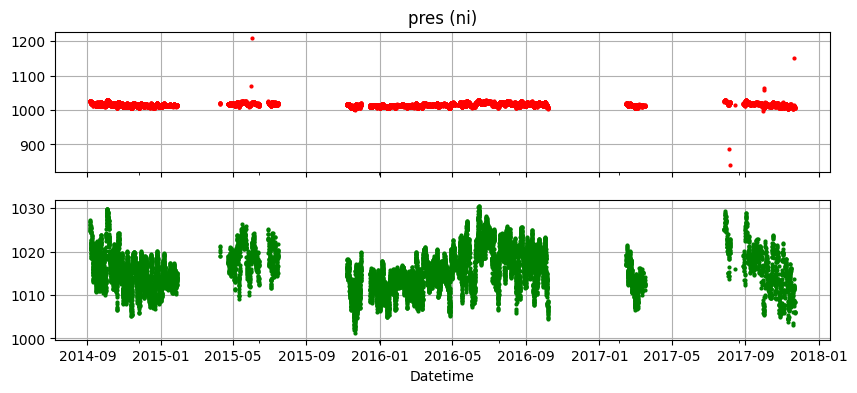

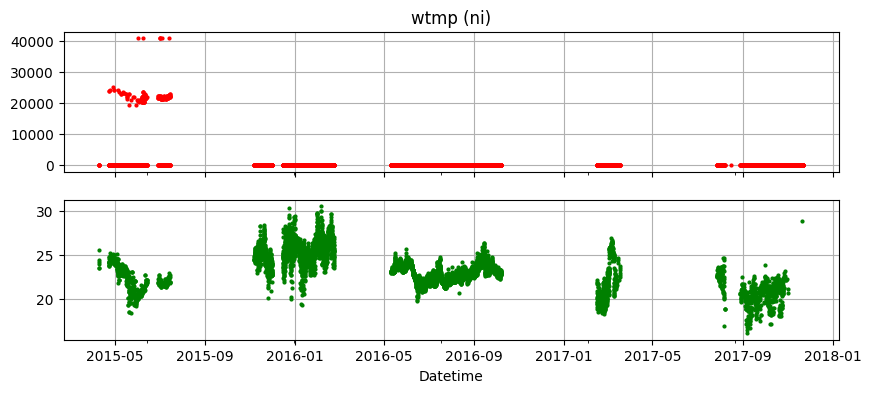

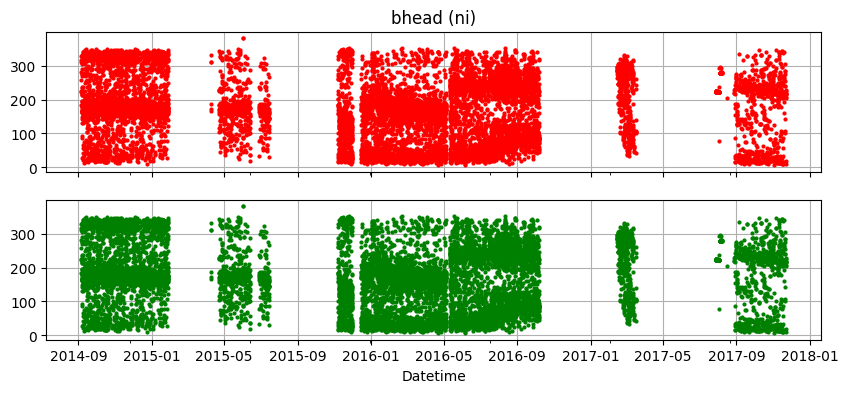

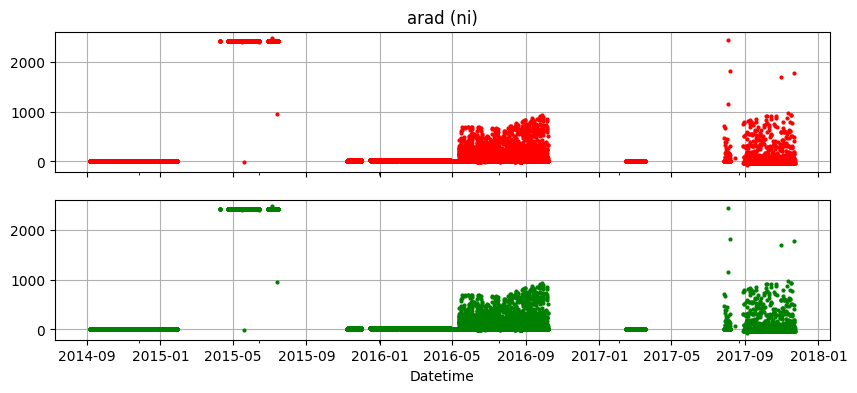

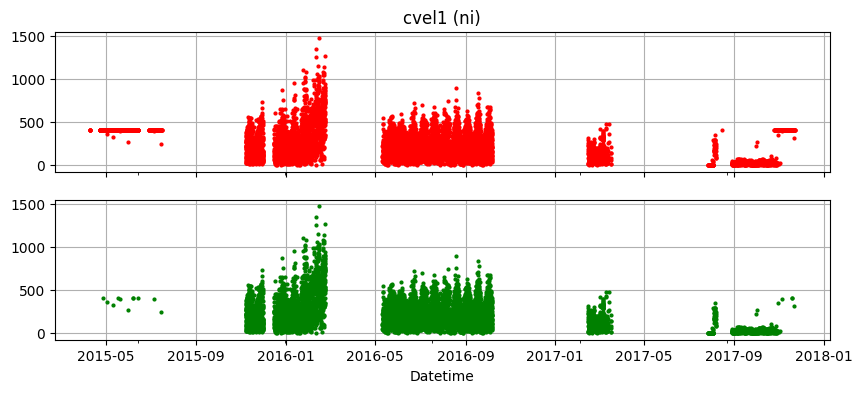

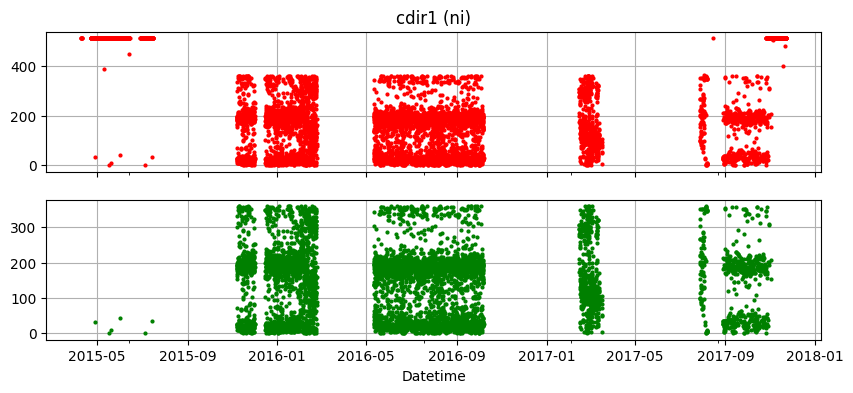

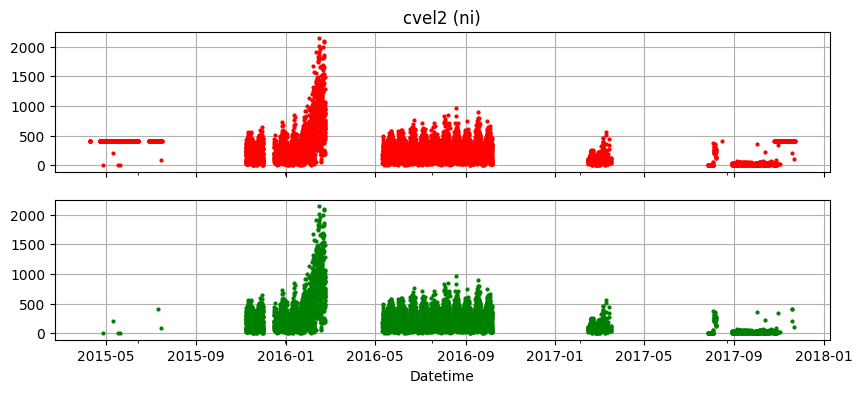

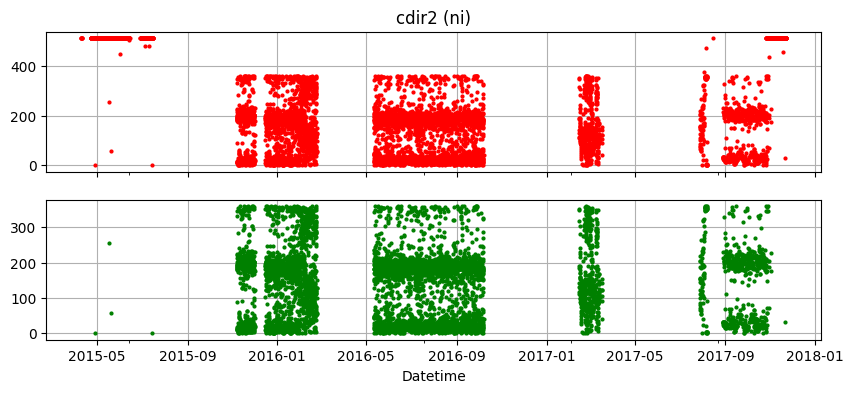

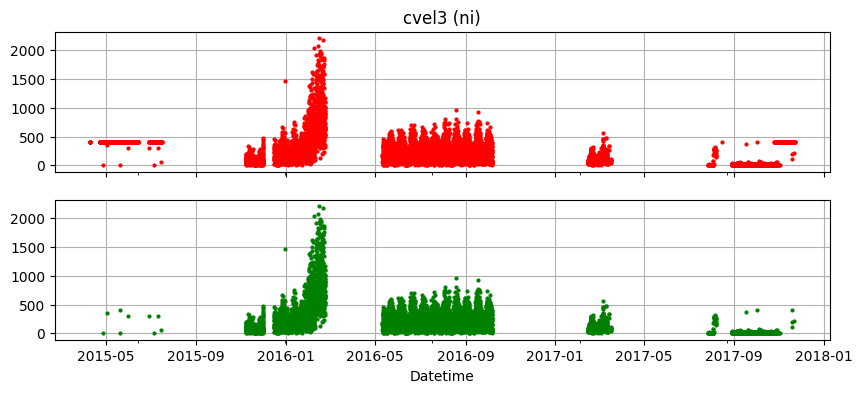

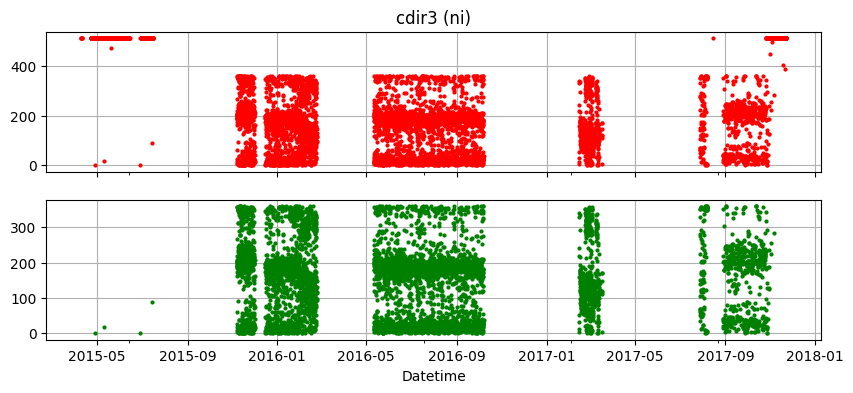

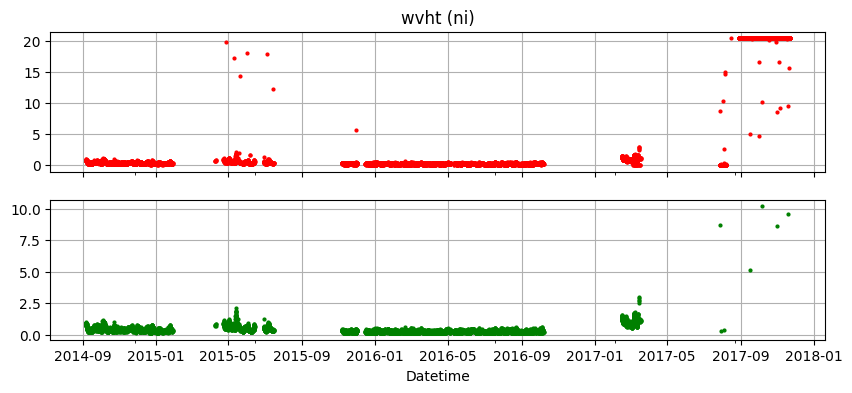

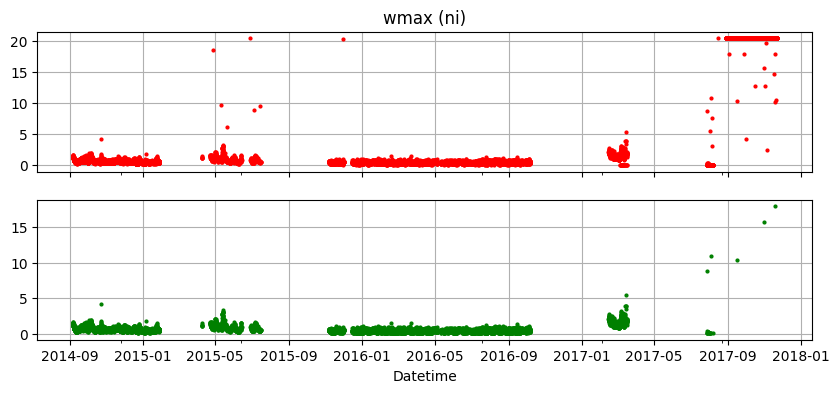

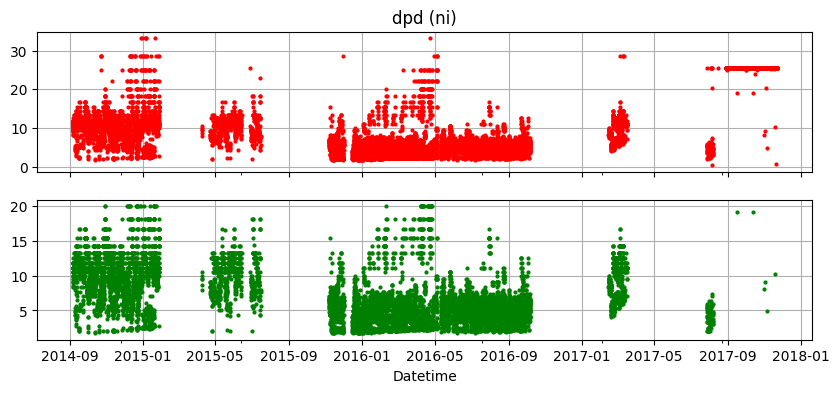

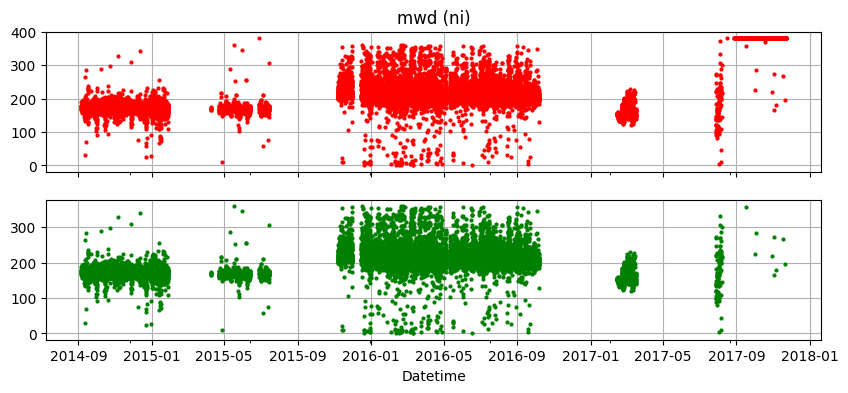

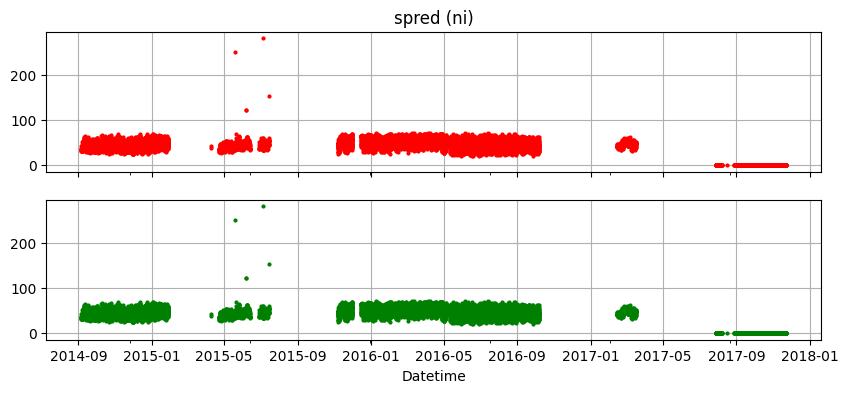

In [66]:
buoy = 'ni'
params_raw = buoys_df.loc[buoy].columns[2:]
params_filt = buoys_filt_df.loc[buoy].columns
for param, param_filt in zip(params_raw,params_filt):
    fig, ax = plt.subplots(2,1,sharex=True,figsize=(10,4))
    buoys_df.loc[buoy,param].plot(subplots=True,color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax[0]);
    buoys_filt_df.loc[buoy,param_filt].plot(subplots=True,color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax[1]);
    ax[0].set_title(param+' '+f'({buoy})')
    plt.show()